In [41]:
## Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
merge_test = pd.read_csv("merge_test.csv")

In [44]:
merge_train = pd.read_csv("merge_train.csv")

In [45]:
merge_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,NaN,-1572.0,378000.00,373239.00,0.0,3.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,-373.0,568800.00,543087.00,0.0,2.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [46]:
merge_train


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<BarContainer object of 2 artists>

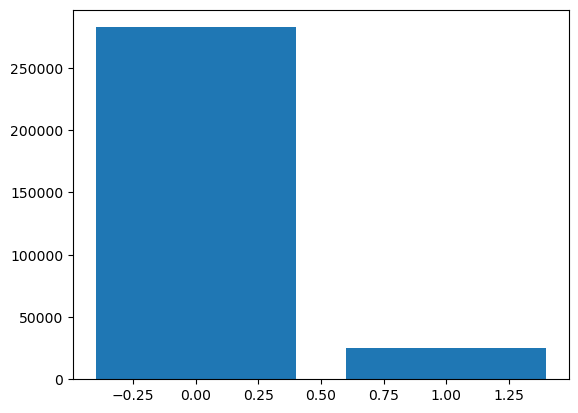

In [47]:
#observando distribución de la columna TARGET, hay un gran desbalance de clases
plt.bar(merge_train['TARGET'].value_counts().index,merge_train['TARGET'].value_counts())

### KMeans con scikit-learn

In [48]:
from sklearn.cluster import KMeans # For KMeans clustering
from sklearn.preprocessing import StandardScaler # For feature scaling

In [49]:
#selección de columnas
all_columns = list(merge_test.columns)

In [50]:
merge_test.dtypes

SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
CODE_GENDER                object
FLAG_OWN_CAR               object
FLAG_OWN_REALTY            object
                           ...   
AMT_CREDIT_SUM_DEBT       float64
CNT_CREDIT_PROLONG_MAX    float64
ACTIVE                    float64
BAD_DEBT                  float64
COMPLETED                 float64
Length: 131, dtype: object

In [51]:
merge_test.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [58]:
text_var=[]
for col in merge_test:
    if merge_test[col].dtypes == object or merge_test[col].dtype == str:
         print(col,merge_test[col].dtypes)
         text_var.append(col)

NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
OCCUPATION_TYPE object
WEEKDAY_APPR_PROCESS_START object
ORGANIZATION_TYPE object
FONDKAPREMONT_MODE object
HOUSETYPE_MODE object
WALLSMATERIAL_MODE object
EMERGENCYSTATE_MODE object


In [59]:
text_var

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

las columnas ya estan codificadas en sus respectivas columnas  col_encoded 

In [54]:
for col in merge_train:
    if col in text_var:
        merge_train.drop(col, axis=1, inplace=True)

In [64]:
merge_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,NaN,1,0,0,1,1,0,1.0,2,2,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,NaN,1,1,0,1,0,1,1.0,3,3,0.74

In [65]:
scaler = StandardScaler()
merge_test_scaled = scaler.fit_transform(merge_train)

In [76]:
#muestra el nombre de columna, la cantidad de valores únicos que toma, y la razón de valores nulos que contiene
cols_avg=[]
for col in merge_train:
        if '_AVG' in col:
                cols_avg.append(col)
        

cols_avg

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [77]:
for col in merge_train:
    if col in cols_avg:
        merge_train.drop(col, axis=1, inplace=True)

In [78]:
merge_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,NaN,1,0,0,1,1,0,1.0,2,2,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,NaN,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,NaN,-919.0,2250000.0,1624797.0,0.0,2.0,0.0,0.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,NaN,-1104.0,45000.0,0.0,0.0,0.0,0.0,0.0


In [79]:
cols_credit_bureau=[]
for notcol in merge_train:
        if '_CREDIT_BUREAU_' in col:
                cols_credit_bureau.append(col)

cols_credit_bureau

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [80]:
for col in merge_train:
    if col in cols_credit_bureau:
        merge_train.drop(col, axis=1, inplace=True)

In [86]:
cols_numericas=['CNT_CHILDREN', 'AMT_INCOME_TOTAL',	'AMT_CREDIT'	,'AMT_ANNUITY'	,'AMT_GOODS_PRICE'	,'REGION_POPULATION_RELATIVE',	'YEARS_OLD',	'YEARS_EMPLOYED',	'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1'	,'EXT_SOURCE_2',	'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CNT_INSTALMENT_MAX	DAYS_PST_DUE_MAX'	,'AMT_LARGEST_RECORDED_DEBT',	'DAYS_SINCE_LAST_APPLICATION'	,'AMT_CREDIT_MAX'	,'AMT_CREDIT_SUM_DEBT'	,'CNT_CREDIT_PROLONG_MAX'	,'ACTIVE'	,'BAD_DEBT',	'COMPLETED',  'CNT_INSTALMENT_MAX',
 'DAYS_PST_DUE_MAX']

In [89]:
cols_numericas

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_OLD',
 'YEARS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_INSTALMENT_MAX\tDAYS_PST_DUE_MAX',
 'AMT_LARGEST_RECORDED_DEBT',
 'DAYS_SINCE_LAST_APPLICATION',
 'AMT_CREDIT_MAX',
 'AMT_CREDIT_SUM_DEBT',
 'CNT_CREDIT_PROLONG_MAX',
 'ACTIVE',
 'BAD_DEBT',
 'COMPLETED',
 'CNT_INSTALMENT_MAX',
 'DAYS_PST_DUE_MAX']

In [87]:
cols_categoricas=[]
for col in merge_train:
        if not col in cols_numericas:
                cols_categoricas.append(col)

In [88]:
cols_categoricas

['SK_ID_CURR',
 'TARGET',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_CONTRACT_TYPE_encoded',
 'CODE_GENDER_encoded',
 'FLAG_OWN_CAR_encoded',
 'FLAG_OWN_REALTY_encoded',
 'NAME_TYPE_SUITE_encoded',
 'NAME_INCOME_TYPE_encoded',
 'NAME_EDUCATION_TYPE_encoded',
 'NAME_FAMILY_STATUS_encoded',
 'NAME_HOUSING_TYPE_encoded',
 'OCCUPATION_TYPE_encoded',
 'ORGANIZATION_TYPE_encoded',
 'DOCUMENT_COUNT']